In [522]:
import requests, bs4, re
import pandas as pd
import statsmodels.api as sm
from bs4 import BeautifulSoup as bs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
import numpy as np
from sklearn.metrics import mean_squared_error , r2_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler 

In [2]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


## Webscraping

Used Selenium to run the webpage and included a 'Wait' feature in the loop to ensure the code had time to scrape the data before loading the next year's data. 

Due to the inconsistency of webscraping through 25 urls (1996 - 2020 NBA seasons), I am creating 5 dataframes that holds five seasons of data each and concatenating them into a single dataframe at the end.

In [22]:
import os
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [166]:
start_year = 1996
end_year = 1997

driver = webdriver.Chrome(r'C:\Users\Jay Yee\Downloads\chromedriver.exe')
df_list = []

while True:
    driver.get('https://www.nba.com/stats/teams/traditional/?sort=W_PCT&dir=-1&Season=' + str(start_year) + '-' + str(end_year)[-2:] + '&SeasonType=Regular%20Season')
    soup = bs(driver.page_source)
    element = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'nba-stat-table__overflow')))

    table = soup.find(class_= 'nba-stat-table__overflow')
    df_list.append(pd.read_html(str(table))[0])
    start_year += 1
    end_year += 1
    if start_year == 2001:
        break

data_2000 = pd.concat(df_list)

<ipython-input-166-339efadcbe97>:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r'C:\Users\Jay Yee\Downloads\chromedriver.exe')


In [167]:
data_2000.info

<bound method DataFrame.info of     Unnamed: 0                   TEAM  GP   W   L   WIN%   MIN    PTS   FGM  \
0            1          Chicago Bulls  82  69  13  0.841  48.1  103.1  40.0   
1            2              Utah Jazz  82  64  18  0.780  48.4  103.1  38.2   
2            3             Miami Heat  82  61  21  0.744  48.3   94.8  34.4   
3            4        Houston Rockets  82  57  25  0.695  48.4  100.6  37.0   
4            4        New York Knicks  82  57  25  0.695  48.4   95.4  35.1   
..         ...                    ...  ..  ..  ..    ...   ...    ...   ...   
24          25          Atlanta Hawks  82  25  57  0.305  48.1   91.0  35.1   
25          26    Vancouver Grizzlies  82  23  59  0.280  48.2   91.7  35.0   
26          27     Washington Wizards  82  19  63  0.232  48.0   93.2  34.5   
27          28  Golden State Warriors  82  17  65  0.207  48.2   92.5  35.8   
28          29          Chicago Bulls  82  15  67  0.183  48.4   87.6  33.2   

     FGA  ...  DREB

In [170]:
start_year = 2001
end_year = 2002

driver = webdriver.Chrome(r'C:\Users\Jay Yee\Downloads\chromedriver.exe')
df_list = []

while True:
    driver.get('https://www.nba.com/stats/teams/traditional/?sort=W_PCT&dir=-1&Season=' + str(start_year) + '-' + str(end_year)[-2:] + '&SeasonType=Regular%20Season')
    soup = bs(driver.page_source)
    element = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'first')))

    table = soup.find(class_= 'nba-stat-table__overflow')
    df_list.append(pd.read_html(str(table))[0])
    start_year += 1
    end_year += 1
    if start_year == 2006:
        break

data_2005 = pd.concat(df_list)

<ipython-input-170-07db8cb1dafd>:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r'C:\Users\Jay Yee\Downloads\chromedriver.exe')


In [171]:
data_2005.info

<bound method DataFrame.info of     Unnamed: 0                    TEAM  GP   W   L   WIN%   MIN    PTS   FGM  \
0            1        Sacramento Kings  82  61  21  0.744  48.2  104.6  39.8   
1            2      Los Angeles Lakers  82  58  24  0.707  48.2  101.3  38.4   
2            2       San Antonio Spurs  82  58  24  0.707  48.4   96.7  35.5   
3            4        Dallas Mavericks  82  57  25  0.695  48.5  105.2  39.0   
4            5         New Jersey Nets  82  52  30  0.634  48.4   96.2  37.1   
..         ...                     ...  ..  ..  ..    ...   ...    ...   ...   
25          26         Toronto Raptors  82  27  55  0.329  48.7  101.1  36.7   
26          27           Atlanta Hawks  82  26  56  0.317  48.5   97.2  35.9   
27          27       Charlotte Bobcats  82  26  56  0.317  48.5   96.9  36.1   
28          29         New York Knicks  82  23  59  0.280  48.6   95.6  34.4   
29          30  Portland Trail Blazers  82  21  61  0.256  48.1   88.8  34.0   

     FG

In [176]:
start_year = 2006
end_year = 2007

driver = webdriver.Chrome(r'C:\Users\Jay Yee\Downloads\chromedriver.exe')
df_list = []

while True:
    driver.get('https://www.nba.com/stats/teams/traditional/?sort=W_PCT&dir=-1&Season=' + str(start_year) + '-' + str(end_year)[-2:] + '&SeasonType=Regular%20Season')
    soup = bs(driver.page_source)
    element = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'first')))

    table = soup.find(class_= 'nba-stat-table__overflow')
    df_list.append(pd.read_html(str(table))[0])
    start_year += 1
    end_year += 1
    if start_year == 2011:
        break

data_2010 = pd.concat(df_list)

<ipython-input-176-abb9fa589690>:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r'C:\Users\Jay Yee\Downloads\chromedriver.exe')


In [177]:
data_2010.info

<bound method DataFrame.info of     Unnamed: 0                    TEAM  GP   W   L   WIN%   MIN    PTS   FGM  \
0            1        Dallas Mavericks  82  67  15  0.817  48.2  100.0  36.7   
1            2            Phoenix Suns  82  61  21  0.744  48.5  110.2  41.3   
2            3       San Antonio Spurs  82  58  24  0.707  48.2   98.5  36.6   
3            4         Detroit Pistons  82  53  29  0.646  48.5   96.0  35.9   
4            5         Houston Rockets  82  52  30  0.634  48.4   97.0  35.4   
..         ...                     ...  ..  ..  ..    ...   ...    ...   ...   
25          25        Sacramento Kings  82  24  58  0.293  48.4   99.4  38.2   
26          27      Washington Wizards  82  23  59  0.280  48.6   97.3  37.2   
27          28         Toronto Raptors  82  22  60  0.268  48.2   99.1  38.3   
28          29     Cleveland Cavaliers  82  19  63  0.232  48.2   95.5  35.2   
29          30  Minnesota Timberwolves  82  17  65  0.207  48.2  101.1  37.7   

     FG

In [185]:
start_year = 2011
end_year = 2012

driver = webdriver.Chrome(r'C:\Users\Jay Yee\Downloads\chromedriver.exe')
df_list = []

while True:
    driver.get('https://www.nba.com/stats/teams/traditional/?sort=W_PCT&dir=-1&Season=' + str(start_year) + '-' + str(end_year)[-2:] + '&SeasonType=Regular%20Season')
    soup = bs(driver.page_source)
    element = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'first')))

    table = soup.find(class_= 'nba-stat-table__overflow')
    df_list.append(pd.read_html(str(table))[0])
    start_year += 1
    end_year += 1
    if start_year == 2016:
        break

data_2015 = pd.concat(df_list)

<ipython-input-185-7751acd6d394>:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r'C:\Users\Jay Yee\Downloads\chromedriver.exe')


In [186]:
data_2015.info

<bound method DataFrame.info of     Unnamed: 0                    TEAM  GP   W   L   WIN%   MIN    PTS   FGM  \
0            1           Chicago Bulls  66  50  16  0.758  48.3   96.3  37.4   
1            1       San Antonio Spurs  66  50  16  0.758  48.3  103.7  39.6   
2            3   Oklahoma City Thunder  66  47  19  0.712  48.5  103.1  37.3   
3            4              Miami Heat  66  46  20  0.697  48.6   98.5  37.1   
4            5          Indiana Pacers  66  42  24  0.636  48.5   97.7  35.7   
..         ...                     ...  ..  ..  ..    ...   ...    ...   ...   
25          26  Minnesota Timberwolves  82  29  53  0.354  48.5  102.4  37.7   
26          27            Phoenix Suns  82  23  59  0.280  48.1  100.9  37.2   
27          28           Brooklyn Nets  82  21  61  0.256  48.2   98.6  38.2   
28          29      Los Angeles Lakers  82  17  65  0.207  48.1   97.3  35.1   
29          30      Philadelphia 76ers  82  10  72  0.122  48.3   97.4  36.2   

     FG

In [190]:
start_year = 2016
end_year = 2017

driver = webdriver.Chrome(r'C:\Users\Jay Yee\Downloads\chromedriver.exe')
df_list = []

while True:
    driver.get('https://www.nba.com/stats/teams/traditional/?sort=W_PCT&dir=-1&Season=' + str(start_year) + '-' + str(end_year)[-2:] + '&SeasonType=Regular%20Season')
    soup = bs(driver.page_source)
    element = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'first')))

    table = soup.find(class_= 'nba-stat-table__overflow')
    df_list.append(pd.read_html(str(table))[0])
    start_year += 1
    end_year += 1
    if start_year == 2021:
        break

data_2020 = pd.concat(df_list)

<ipython-input-190-bcae055c18cc>:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r'C:\Users\Jay Yee\Downloads\chromedriver.exe')


In [191]:
data_2020.info

<bound method DataFrame.info of     Unnamed: 0                   TEAM  GP   W   L   WIN%   MIN    PTS   FGM  \
0            1  Golden State Warriors  82  67  15  0.817  48.2  115.9  43.1   
1            2      San Antonio Spurs  82  61  21  0.744  48.3  105.3  39.3   
2            3        Houston Rockets  82  55  27  0.671  48.2  115.3  40.3   
3            4         Boston Celtics  82  53  29  0.646  48.2  108.0  38.6   
4            5    Cleveland Cavaliers  82  51  31  0.622  48.5  110.3  39.9   
..         ...                    ...  ..  ..  ..    ...   ...    ...   ...   
25          26    Cleveland Cavaliers  72  22  50  0.306  48.4  103.8  38.6   
26          26  Oklahoma City Thunder  72  22  50  0.306  48.2  105.0  38.8   
27          28          Orlando Magic  72  21  51  0.292  48.1  104.0  38.3   
28          29        Detroit Pistons  72  20  52  0.278  48.4  106.6  38.7   
29          30        Houston Rockets  72  17  55  0.236  48.1  108.8  39.3   

     FGA  ...  DREB

In [548]:
frames = [data_2000 , data_2005, data_2010, data_2015, data_2020]

data = pd.concat(frames)

In [165]:
""" This is the original For Loop for all 25 seasons at once

start_year = 1996
end_year = 1997

driver = webdriver.Chrome(r'C:\Users\Jay Yee\Downloads\chromedriver.exe')
df_list = []

while True:
    driver.get('https://www.nba.com/stats/teams/traditional/?sort=W_PCT&dir=-1&Season=' 
        + str(start_year) + '-' + str(end_year)[-2:] + '&SeasonType=Regular%20Season')
    
    soup = bs(driver.page_source)
    element = WebDriverWait(driver, 10).until(EC.presence_of_element_located(
        (By.CLASS_NAME, 'first')))

    table = soup.find(class_= 'nba-stat-table__overflow')
    df_list.append(pd.read_html(str(table))[0])
    start_year += 1
    end_year += 1
    if start_year == 2020:
        break

data = pd.concat(df_list)

"""

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 124-125: truncated \UXXXXXXXX escape (<ipython-input-165-c6618dd2c1f0>, line 1)

## Exploratory Data Analysis

First scrubbed the data of unnecessary columns then ran a multicollinearity test to check which if there were strong correlation between the features. Finally, I ran an initial regression model to check for any features that had high p-values which meant they did not make a strong impact on the predicting varible. The following features were removed as a result: 'FGM' , 'FGA' , '3PM' , '3PA' , 'FTM' , 'FTA' , 'REB' , and '+/-'. 

A PairPlot was graphed to illustrate the end result.

In [549]:
#Check if all the dataframes were correctly combined
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 0 to 29
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  742 non-null    int64  
 1   TEAM        742 non-null    object 
 2   GP          742 non-null    int64  
 3   W           742 non-null    int64  
 4   L           742 non-null    int64  
 5   WIN%        742 non-null    float64
 6   MIN         742 non-null    float64
 7   PTS         742 non-null    float64
 8   FGM         742 non-null    float64
 9   FGA         742 non-null    float64
 10  FG%         742 non-null    float64
 11  3PM         742 non-null    float64
 12  3PA         742 non-null    float64
 13  3P%         742 non-null    float64
 14  FTM         742 non-null    float64
 15  FTA         742 non-null    float64
 16  FT%         742 non-null    float64
 17  OREB        742 non-null    float64
 18  DREB        742 non-null    float64
 19  REB         742 non-null    fl

In [550]:
#Drop columns with N/A values
data = data.dropna(axis = 1)

In [551]:
data.head()

,Unnamed: 0,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,1,Chicago Bulls,82,69,13,0.841,48.1,103.1,40.0,84.4,...,30.0,45.1,26.1,13.5,8.7,4.0,3.5,19.7,0.2,10.8
1,2,Utah Jazz,82,64,18,0.780,48.4,103.1,38.2,75.8,...,29.4,40.2,26.8,15.4,9.1,5.1,4.5,24.1,0.2,8.8
2,3,Miami Heat,82,61,21,0.744,48.3,94.8,34.4,76.0,...,29.3,41.0,21.2,15.9,7.9,5.4,4.8,23.4,0.3,5.5
3,4,Houston Rockets,82,57,25,0.695,48.4,100.6,37.0,79.1,...,31.3,42.6,24.5,16.6,8.4,4.2,4.5,19.6,0.2,4.5
4,4,New York Knicks,82,57,25,0.695,48.4,95.4,35.1,75.9,...,30.7,42.5,22.1,17.8,7.7,4.6,3.6,24.8,0.2,3.1


In [552]:
#Drop unnecessary columns for test data set
data = data.drop(columns = ['Unnamed: 0' , 'GP' , 'W' , 'L' , 'TEAM'])

In [553]:
data.info

<bound method DataFrame.info of      WIN%   MIN    PTS   FGM   FGA   FG%   3PM   3PA   3P%   FTM  ...  DREB  \
0   0.841  48.1  103.1  40.0  84.4  47.3   6.4  17.1  37.3  16.8  ...  30.0   
1   0.780  48.4  103.1  38.2  75.8  50.4   4.1  11.0  37.0  22.7  ...  29.4   
2   0.744  48.3   94.8  34.4  76.0  45.3   8.3  22.7  36.4  17.7  ...  29.3   
3   0.695  48.4  100.6  37.0  79.1  46.8   8.2  22.4  36.5  18.3  ...  31.3   
4   0.695  48.4   95.4  35.1  75.9  46.3   5.7  15.8  36.3  19.3  ...  30.7   
..    ...   ...    ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
25  0.306  48.4  103.8  38.6  85.8  45.0  10.0  29.7  33.6  16.7  ...  32.3   
26  0.306  48.2  105.0  38.8  88.0  44.1  11.9  35.1  33.9  15.5  ...  35.7   
27  0.292  48.1  104.0  38.3  89.2  42.9  10.9  31.8  34.3  16.6  ...  35.1   
28  0.278  48.4  106.6  38.7  85.6  45.2  11.6  32.9  35.1  17.8  ...  33.1   
29  0.236  48.1  108.8  39.3  88.5  44.4  13.8  40.6  33.9  16.5  ...  33.3   

     REB   AST   TO

In [554]:
#Create dataframe for actual test data, makes it easier to reset if there are any issues.
test_data = data

In [555]:
test_data.head()

,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,0.841,48.1,103.1,40.0,84.4,47.3,6.4,17.1,37.3,16.8,...,30.0,45.1,26.1,13.5,8.7,4.0,3.5,19.7,0.2,10.8
1,0.780,48.4,103.1,38.2,75.8,50.4,4.1,11.0,37.0,22.7,...,29.4,40.2,26.8,15.4,9.1,5.1,4.5,24.1,0.2,8.8
2,0.744,48.3,94.8,34.4,76.0,45.3,8.3,22.7,36.4,17.7,...,29.3,41.0,21.2,15.9,7.9,5.4,4.8,23.4,0.3,5.5
3,0.695,48.4,100.6,37.0,79.1,46.8,8.2,22.4,36.5,18.3,...,31.3,42.6,24.5,16.6,8.4,4.2,4.5,19.6,0.2,4.5
4,0.695,48.4,95.4,35.1,75.9,46.3,5.7,15.8,36.3,19.3,...,30.7,42.5,22.1,17.8,7.7,4.6,3.6,24.8,0.2,3.1


In [557]:
#Dropping features that had high multicollinearity or high P-values
test_data = data.drop(columns = ['FGM' , 'FGA' , '3PM' , '3PA' , 'FTM' , 'FTA' , 'REB' , '+/-' , 'MIN' , 'PFD' ])

In [558]:
#Create feature and variable dataframes X and y, respectively
X = test_data.drop(columns = ['WIN%'])
X = sm.add_constant(X)
y = test_data['WIN%']

In [559]:
#Check for multicollinearity between variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['variables'] = X.columns
vif['vif'] =[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif.round(1)

,variables,vif
0,const,3761.6
1,PTS,4.4
2,FG%,2.9
3,3P%,1.7
4,FT%,1.4
5,OREB,2.0
6,DREB,3.6
7,AST,1.9
8,TOV,1.7
9,STL,1.4


In [560]:
#Create train and test datasets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [561]:
X_train.shape , y_train.shape

((593, 13), (593,))

In [562]:
X_test.shape, y_test.shape

((149, 13), (149,))

In [563]:
model = sm.OLS(y,X, data = test_data)
fantasy_model = model.fit()
fantasy_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   WIN%   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     132.9
Date:                Tue, 09 Nov 2021   Prob (F-statistic):          2.72e-174
Time:                        16:02:43   Log-Likelihood:                 766.72
No. Observations:                 742   AIC:                            -1507.
Df Residuals:                     729   BIC:                            -1448.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5030      0.196    -17.911      0.000      -3.887      -3.119
PTS           -0.0146      0.001    -14.784      0.000      -0.017      -0.013
FG%            0.0631      0.003     18.900      0.000       0.057       0.070
3P%            0.0175      0.002      8.667      0.000       0.014       0.022
FT%            0.0050      0.001      4.038      0.000       0.003       0.007
OREB           0.0418      0.003     13.709      0.000       0.036       0.048
DREB           0.0439      0.003     16.771      0.000       0.039       0.049
AST           -0.0041      0.002     -1.993      0.047      -0.008   -6.14e-05
TOV           -0.0401      0.003    -11.704      0.000      -0.047      -0.033
STL            0.0621      0.004     14.973      0.000       0.054       0.070
BLK            0.0105      0.004      2.487      0.013       0.002       0.019
BLKA          -0.0404      0.006     -7.112      0.000      -0.052      -0.029
PF             0.0051      0.002      2.270      0.024       0.001       0.009
==============================================================================
Omnibus:                        2.788   Durbin-Watson:                   1.360
Prob(Omnibus):                  0.248   Jarque-Bera (JB):                2.624
Skew:                           0.137   Prob(JB):                        0.269
Kurtosis:                       3.100   Cond. No.                     8.98e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002765E312790>,
      dtype=object)

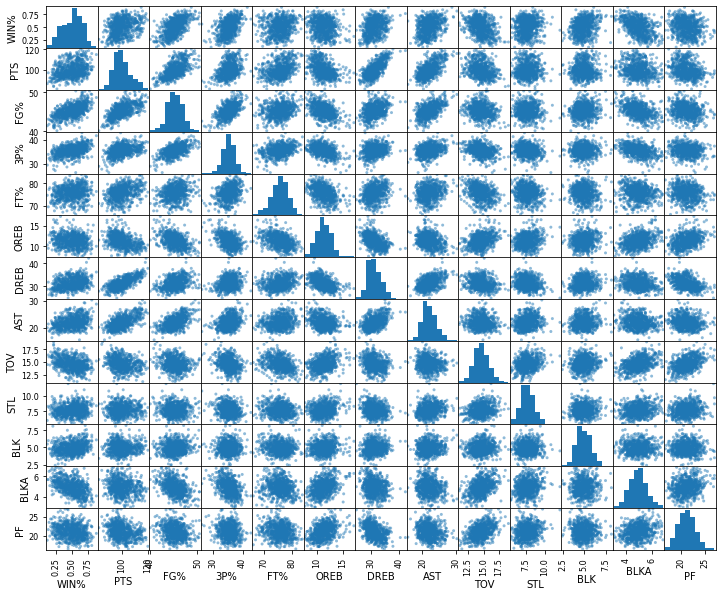

In [338]:
pd.plotting.scatter_matrix(test_data, figsize=(12,10))

## Regression Models

First standardized the data so larger features are not penalized as hard. Then calculated the R^2 using Linear Regression, Ridge Regression, and LASSO Regression models. Used cross-validation to then find the best fit model to use for final prediction. 

In [566]:
#Scaling data to standardize it
std = StandardScaler()
std.fit(X_train.values)

X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

In [606]:
#Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

Regression_r_squared_train = linear_model.score(X_train, y_train)
Regression_r_squared_test = linear_model.score(X_test, y_test)

list(zip(X_train.columns, linear_model.coef_))

[('const', 0.0),
 ('PTS', -0.013986600095817267),
 ('FG%', 0.06192132750074357),
 ('3P%', 0.01680943247178966),
 ('FT%', 0.005100954142592436),
 ('OREB', 0.04157063717468357),
 ('DREB', 0.04246256103646658),
 ('AST', -0.0036942198300404755),
 ('TOV', -0.04209953742597461),
 ('STL', 0.05694477245386577),
 ('BLK', 0.010443178175270223),
 ('BLKA', -0.04282173842424827),
 ('PF', 0.005840726914102532)]

In [599]:
#Calculating a servicable lambda for the Ridge Regression model 
alphas = 10**np.linspace(-2,2,200)
ridge_model = RidgeCV(alphas = alphas, cv=5)

ridge_model.fit(X_tr, y_train)
ridge_model.score(X_tr, y_train)

alphaRidge = ridge_model.alpha_

print(alphaRidge)
list(zip(X_train.columns, lr_model_ridge.coef_))

1.0234114021054528


[('const', 0.0),
 ('PTS', -0.01295037432341663),
 ('FG%', 0.06101749513827406),
 ('3P%', 0.017859670103662652),
 ('FT%', 0.005029338816370702),
 ('OREB', 0.03813361372818644),
 ('DREB', 0.04097894575026268),
 ('AST', -0.006418560246689801),
 ('TOV', -0.04050906064275541),
 ('STL', 0.06548009216135599),
 ('BLK', 0.01166732394375601),
 ('BLKA', -0.04295287089404598),
 ('PF', 0.0026416423776766712)]

In [600]:
#Calculating Ridge Regression model based on new lambda
ridge_model = Ridge(alpha = alphaRidge)
ridge_model.fit(X_tr, y_train)

Ridge_r_squared_train = ridge_model.score(X_tr, y_train)
Ridge_r_squared_test = ridge_model.score(X_te, y_test)

list(zip(X_train.columns, lr_model_ridge.coef_))

[('const', 0.0),
 ('PTS', -0.01295037432341663),
 ('FG%', 0.06101749513827406),
 ('3P%', 0.017859670103662652),
 ('FT%', 0.005029338816370702),
 ('OREB', 0.03813361372818644),
 ('DREB', 0.04097894575026268),
 ('AST', -0.006418560246689801),
 ('TOV', -0.04050906064275541),
 ('STL', 0.06548009216135599),
 ('BLK', 0.01166732394375601),
 ('BLKA', -0.04295287089404598),
 ('PF', 0.0026416423776766712)]

In [601]:
#Calculating a servicable lambda for the LASSO Regression model 
alphas = 10**np.linspace(-2,2,200)
lasso_model = LassoCV(alphas = alphas, cv=5)
lasso_model.fit(X_tr, y_train)

LASSO_r_squared_train = lasso_model.score(X_tr, y_train)
LASSO_r_squared_test = lasso_model.score(X_te, y_test)

alphaLasso = lasso_model.alpha_

In [602]:
#Run a LASSO Regression model based on new lambda
lasso_model = Lasso(alpha = alphaLasso)
lasso_model.fit(X_tr, y_train)

LASSO_r_squared_train = lasso_model.score(X_tr, y_train)
LASSO_r_squared_test = lasso_model.score(X_te, y_train)

print(list(zip(X_train.columns, lasso.coef_)))

[('const', 0.0), ('PTS', -0.00754079290995866), ('FG%', 0.049994834296157586), ('3P%', 0.014297732611050174), ('FT%', 0.0011683344901524395), ('OREB', 0.019546344120757318), ('DREB', 0.025045546725033504), ('AST', -0.0), ('TOV', -0.031937423233095584), ('STL', 0.036086186857456945), ('BLK', 0.0038565389314914995), ('BLKA', -0.022746970145398837), ('PF', -0.0)]


In [609]:
print('Linear Regression R^2 (train data): ', Regression_r_squared_train)
print('LASSO Regression R^2 (train data): ' , LASSO_r_squared_train)
print('Ridge Regression R^2 (train data): ' , Ridge_r_squared_train)
print('')
print('Linear Regression R^2 (test data): ', Regression_r_squared_test)
print('LASSO Regression R^2 (test data): ' , LASSO_r_squared_test)
print('Ridge Regression R^2 (test data): ' , Ridge_r_squared_test)

Linear Regression R^2 (train data):  0.6792456007244143
LASSO Regression R^2 (train data):  0.546206591574654
Ridge Regression R^2 (train data):  0.6792094971625352

Linear Regression R^2 (test data):  0.7072837296186948
LASSO Regression R^2 (test data):  0.47779356613222823
Ridge Regression R^2 (test data):  0.7063927167365597


In [613]:
#Cross Validation of data set using the above three models that were created 
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state = 42)

linear_model_r2 , ridge_model_r2 , lasso_model_r2 = [] , [] , [] 

#Linear Regression
for train_ind, val_ind in kf.split(X,y):
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_val, y_val = X.iloc[val_ind], y.iloc[val_ind] 
    
    linear_model.fit(X_train, y_train)
    linear_model_r2.append(linear_model.score(X_val, y_val))

#Ridge Regression
for train_ind, val_ind in kf.split(X,y):
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]     
    
    ridge_model.fit(X_train, y_train)
    ridge_model_r2.append(ridge_model.score(X_val, y_val))

#LASSO Regression
for train_ind, val_ind in kf.split(X,y):
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]     

    lasso_model.fit(X_train, y_train)
    lasso_model_r2.append(lasso_model.score(X_val, y_val))

    
#Ridge Regression is better but not materially based on the R^2 so the linear Regression model was chosen for its simplicity.
print('Linear R^2: ' , np.mean(linear_model_r2))
print('Ridge R^2: ' , np.mean(ridge_model_r2))
print('LASSO R^2: ' , np.mean(lasso_model_r2))

Linear R^2:  0.6708170027096416
Ridge R^2:  0.6708344427707431
LASSO R^2:  0.6194825127565968


In [537]:
#Showing final results of the Linear Regression Model
prediction = linear_model.predict(X_test)

#Mean Absolute Error used due to smaller data set
mae = mean_squared_error(y_test, prediction)
print('The MAE is: %.4f' % mae)

r2 = r2_score(y_test , prediction)
print('The R^2 is: %.4f' % r2)

The MAE is: 0.0063
The R^2 is: 0.7196


In [538]:
prediction_coef = pd.DataFrame()
prediction_coef['Variables'] = X_test.columns
prediction_coef['coef'] = linear_model.coef_

prediction_coef

,Variables,coef
0,const,0.000000
1,PTS,-0.013777
2,FG%,0.060234
3,3P%,0.018617
4,FT%,0.005472
5,OREB,0.040736
6,DREB,0.041154
7,AST,-0.005032
8,TOV,-0.039972
9,STL,0.067268


Text(0.5, 1.0, 'Actual vs Prediction Data')

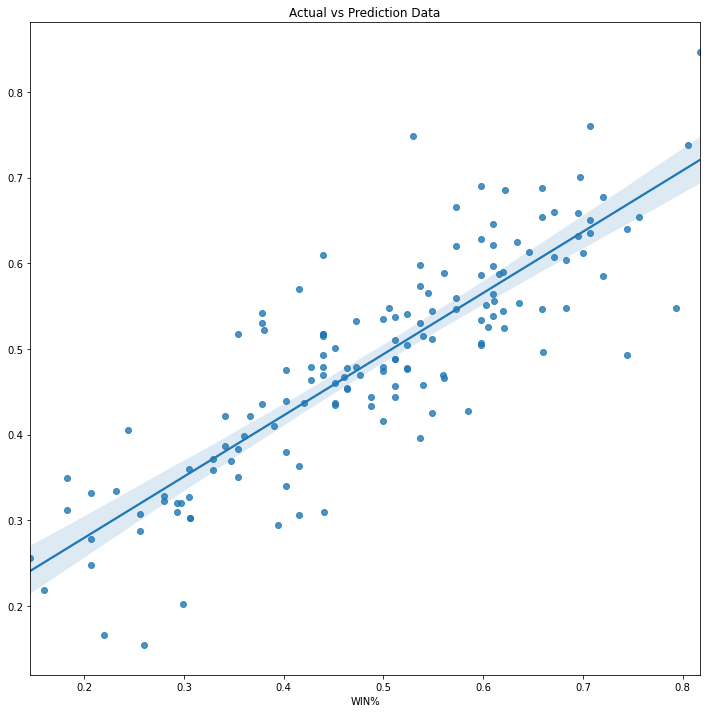

In [539]:
chart = sns.regplot(y_test , prediction)
chart.figure.set_size_inches(12, 12)
chart.set_title('Actual vs Prediction Data')

In [ ]:
"""Based on the above regplot, there is a positive relationship between the y_test data set and the predicted values from
the Linear Regression model, which further illustrates that the model is relatively accurate."""